In [14]:
# import necessary dependencies

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression


In [10]:
credit_card_data = pd.read_csv(r"creditcard.csv")

In [11]:
credit_card_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81294,58872,1.104942,-0.900171,0.271719,-0.528821,-1.064148,-0.533231,-0.366603,-0.121795,-0.855554,...,-0.384664,-0.898500,0.062703,0.098835,-0.024267,0.920347,-0.062583,0.029725,133.76,0.0
81295,58872,-0.438214,0.492120,2.440138,0.454998,-0.148495,0.476077,0.115241,0.232635,-0.057007,...,0.263317,0.865982,-0.093755,-0.026039,-0.602399,-0.453104,0.032011,-0.068108,17.85,0.0
81296,58872,-0.473593,1.109975,1.704117,-0.019309,0.076774,-0.585510,0.718295,-0.023019,-0.619852,...,-0.165078,-0.312285,0.027214,0.417189,-0.266886,0.076342,0.291547,0.123537,0.89,0.0
81297,58873,-2.769864,1.253167,0.752106,0.455407,-1.894425,0.539661,1.081240,-0.188369,1.288851,...,-0.139859,0.276332,0.232680,0.403653,-0.699800,-0.894091,-1.689498,-0.295784,245.00,0.0


In [12]:
ccd = credit_card_data

In [13]:
ccd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81299 entries, 0 to 81298
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    81299 non-null  int64  
 1   V1      81299 non-null  float64
 2   V2      81299 non-null  float64
 3   V3      81299 non-null  float64
 4   V4      81299 non-null  float64
 5   V5      81299 non-null  float64
 6   V6      81298 non-null  float64
 7   V7      81298 non-null  float64
 8   V8      81298 non-null  float64
 9   V9      81298 non-null  float64
 10  V10     81298 non-null  float64
 11  V11     81298 non-null  float64
 12  V12     81298 non-null  float64
 13  V13     81298 non-null  float64
 14  V14     81298 non-null  float64
 15  V15     81298 non-null  float64
 16  V16     81298 non-null  float64
 17  V17     81298 non-null  float64
 18  V18     81298 non-null  float64
 19  V19     81298 non-null  float64
 20  V20     81298 non-null  float64
 21  V21     81298 non-null  float64
 22

In [15]:
# no object data type so we wouldn't need any conversions in here

In [16]:
ccd.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [17]:
# no null values, that's great

In [18]:
# distribution of fraudulent and legitimate classes
ccd['Class'].value_counts()

0.0    81100
1.0      198
Name: Class, dtype: int64

In [19]:
# where 1 - depicts fraudulent cases and 0 -  depicts legitimate classes which actually implies that this dataset is highly

## Data Visualization

In [20]:
# visualizing the class distribution in percentage

Class
0.0    99.756452
1.0     0.243548
Name: Class, dtype: float64


<AxesSubplot:ylabel='Class'>

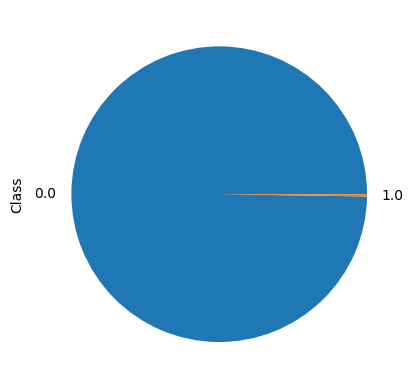

In [21]:
print((ccd.groupby('Class')['Class'].count()/ccd['Class'].count())*100)
((ccd.groupby('Class')['Class'].count()/ccd['Class'].count())*100).plot.pie()

In [22]:
classes = ccd['Class'].value_counts()
normal_value = round(classes[0]/ccd['Class'].count()*100,2)
fraud_values = round(classes[1]/ccd['Class'].count()*100,2)
print(normal_value)
print(fraud_values)

99.76
0.24


In [23]:
# let's check tthe correlation of the features

In [24]:
corr = ccd.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,-0.013925,-0.082910,-0.043661,-0.032350,-0.055022,-0.009466,-0.001258,0.019882,-0.294523,...,0.008656,0.027918,0.001374,-0.002721,0.015738,-0.001105,-0.015549,-0.006571,0.054356,-0.013894
V1,-0.013925,1.000000,0.057876,0.254591,-0.084183,0.033767,0.081312,0.105001,-0.027238,-0.042588,...,-0.011930,-0.050380,-0.072715,-0.011388,0.184268,0.021676,-0.051987,0.127100,-0.253333,-0.162574
V2,-0.082910,0.057876,1.000000,-0.102670,0.053015,-0.065598,0.014305,-0.048966,0.043323,-0.017073,...,-0.012513,-0.029431,0.008274,-0.025602,-0.087388,-0.022378,0.005089,0.002739,-0.554004,0.137032
V3,-0.043661,0.254591,-0.102670,1.000000,-0.105437,0.243695,-0.049882,0.236764,-0.175038,0.136133,...,0.031584,0.233243,0.054219,0.023076,-0.183585,0.044984,-0.091089,0.038353,-0.225941,-0.333239
V4,-0.032350,-0.084183,0.053015,-0.105437,1.000000,-0.015254,-0.046189,-0.044037,0.060421,0.037307,...,0.013247,0.028736,-0.012430,0.000122,-0.001243,-0.013533,0.050494,-0.005517,0.093923,0.180734
V5,-0.055022,0.033767,-0.065598,0.243695,-0.015254,1.000000,0.034152,-0.027642,-0.047753,0.054927,...,-0.055142,-0.068673,0.022209,-0.017287,-0.011857,-0.039077,-0.037045,0.012376,-0.400681,-0.158985
V6,-0.009466,0.081312,0.014305,-0.049882,-0.046189,0.034152,1.000000,0.088006,-0.054060,0.043671,...,0.014881,0.036349,-0.018858,-0.003973,0.044941,0.005438,-0.011696,-0.016829,0.215518,-0.078666
V7,-0.001258,0.105001,-0.048966,0.236764,-0.044037,-0.027642,0.088006,1.000000,-0.051467,0.054032,...,0.022815,-0.040019,0.069559,0.000048,-0.098344,-0.034239,-0.099873,-0.034944,0.387053,-0.266607
V8,0.019882,-0.027238,0.043323,-0.175038,0.060421,-0.047753,-0.054060,-0.051467,1.000000,-0.038433,...,0.054271,0.015439,-0.017122,0.007096,0.015210,0.005321,0.005151,0.029829,-0.098580,0.118478
V9,-0.294523,-0.042588,-0.017073,0.136133,0.037307,0.054927,0.043671,0.054032,-0.038433,1.000000,...,-0.002439,0.031733,-0.045455,0.011220,0.111125,0.109188,-0.018785,-0.008674,-0.022131,-0.133856


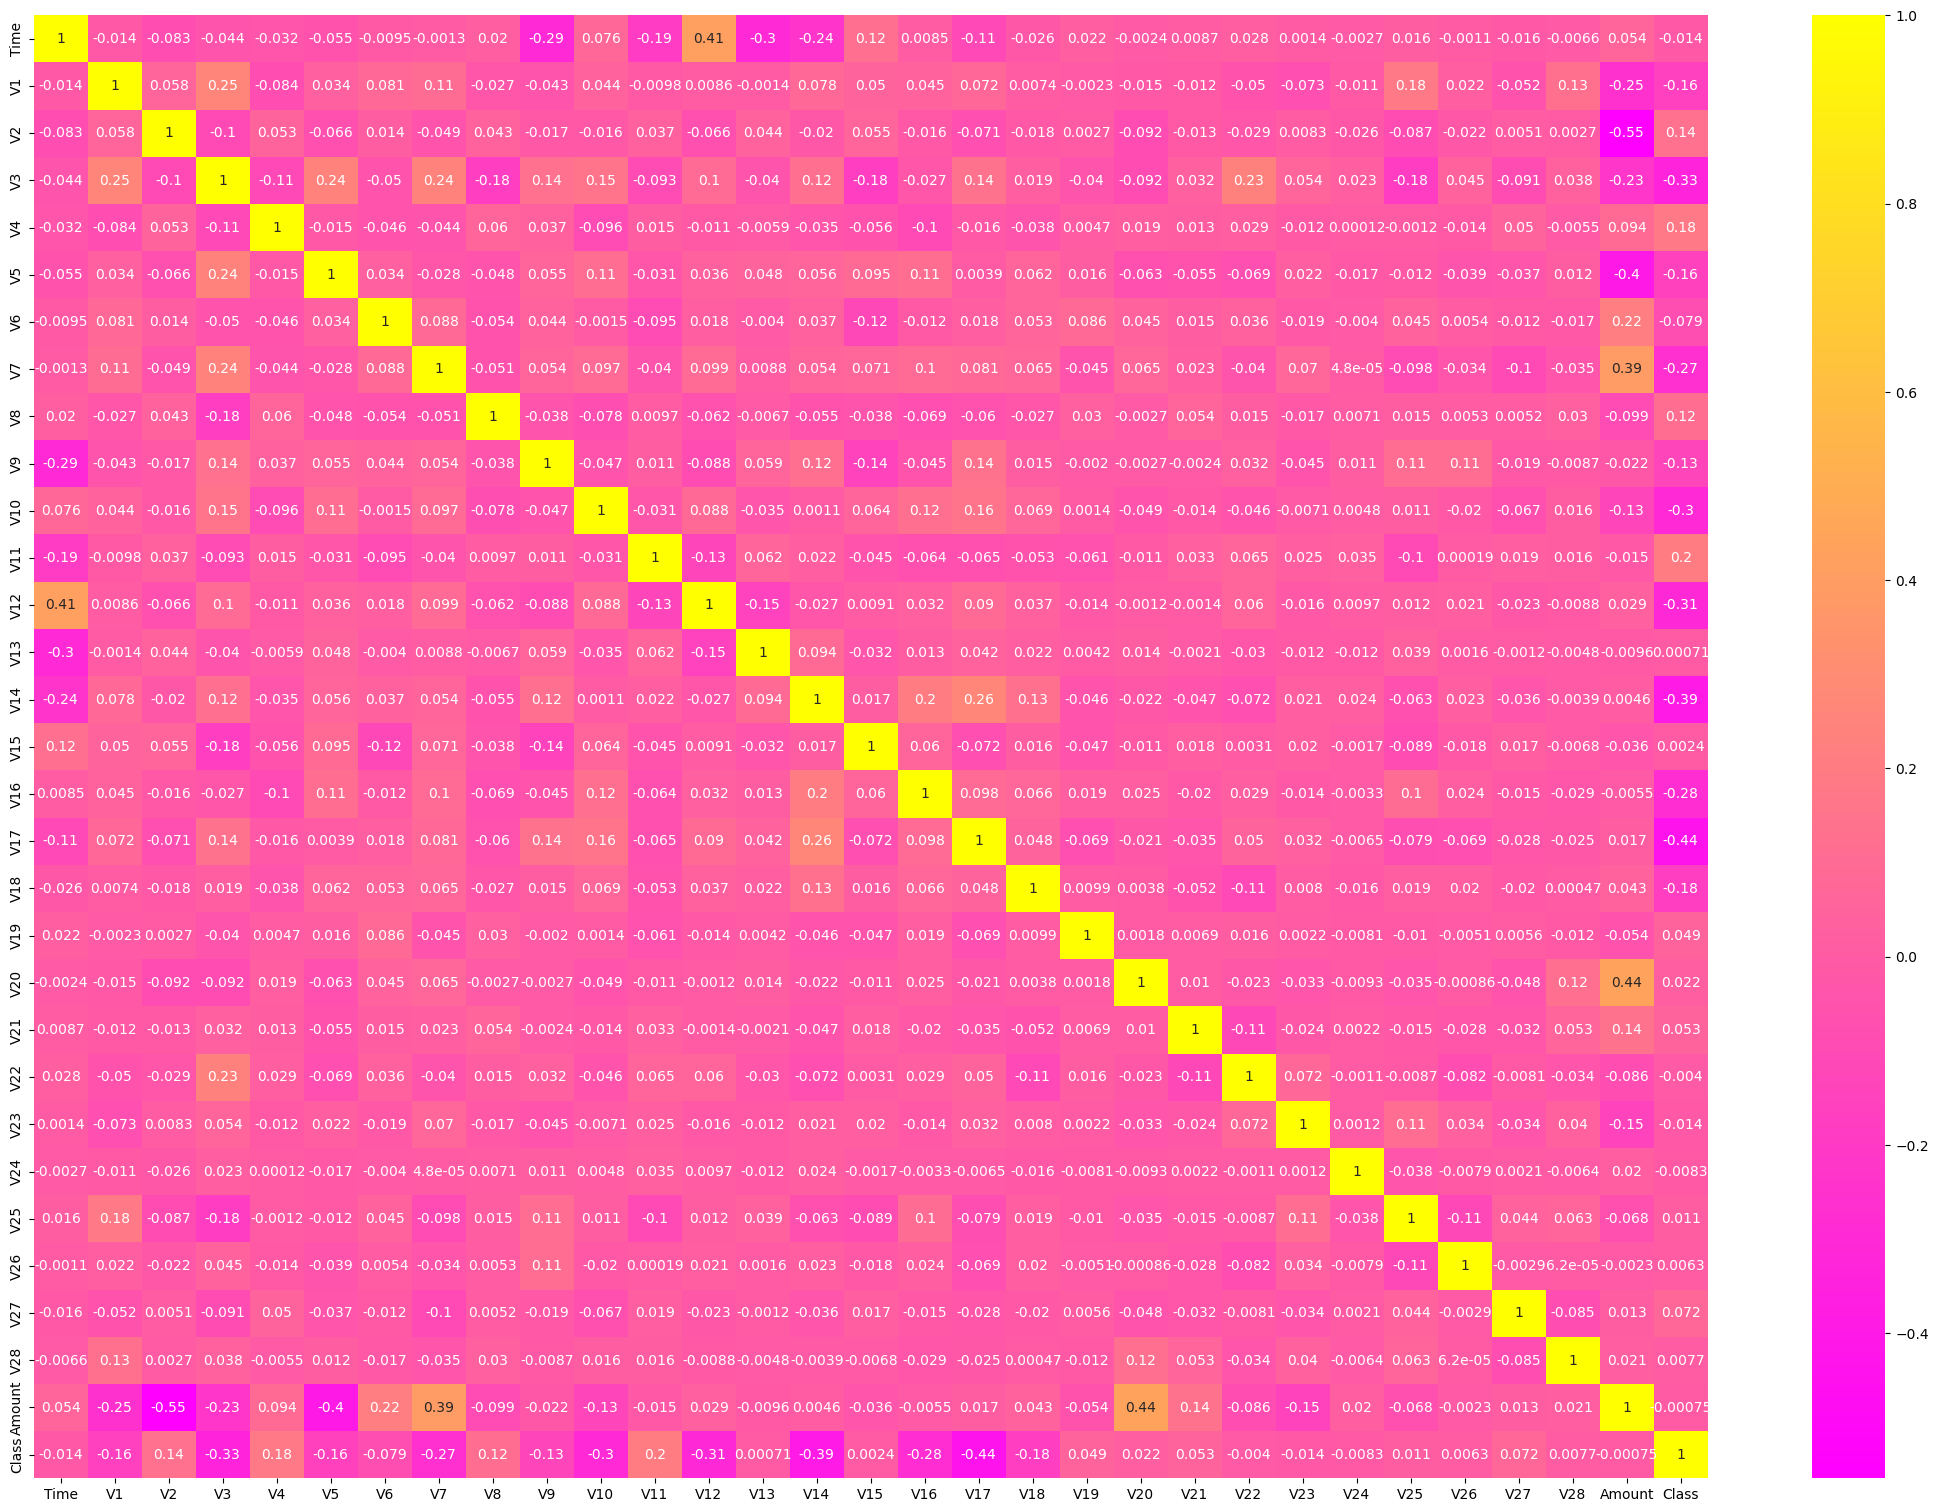

In [25]:
# plotting the heatmap for the correlation
plt.figure(figsize=(27,19))
sns.heatmap(corr, cmap = 'spring', annot= True )
plt.show()

In [27]:
# separte the data according to type of transaction i.e. fraud or legit

In [28]:
legit = ccd[ccd.Class == 0]

In [29]:
fraud = ccd[ccd.Class==1]

In [30]:
legit.Amount.describe()

count    81100.000000
mean        98.107837
std        269.738371
min          0.000000
25%          7.730000
50%         26.990000
75%         89.530000
max      19656.530000
Name: Amount, dtype: float64

In [31]:
fraud.Amount.describe()


count     198.000000
mean       93.992778
std       211.099415
min         0.000000
25%         1.000000
50%         6.410000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [32]:
# we can observe that the mean amount spent for fraud transactions is actually more than for the legit ones

In [33]:
ccd.groupby('Class').describe()

Time                                                        \
         count          mean           std    min       25%      50%   
Class                                                                  
0.0    81100.0  37682.000937  15318.216267    0.0  30983.00  40338.5   
1.0      198.0  33363.156566  15949.274633  406.0  20091.25  35934.0   

                               V1            ...       V28             \
            75%      max    count      mean  ...       75%        max   
Class                                        ...                        
0.0    49595.00  58873.0  81100.0 -0.244848  ...  0.075545  33.847808   
1.0    44168.25  58822.0    198.0 -6.471142  ...  0.403988   1.130625   

        Amount                                                            
         count       mean         std  min   25%    50%    75%       max  
Class                                                                     
0.0    81100.0  98.107837  269.738371  0.0  7.73  26.99  89.53  19656.53  
1.0      198.0  93.992778  211.099415  0.0  1.00   6.41  99.99   1809.68  

[2 rows x 240 columns]

In [34]:
ccd.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,37682.000937,-0.244848,-0.049587,0.701227,0.150821,-0.266673,0.100652,-0.097695,0.045923,-0.005120,...,0.041506,-0.031324,-0.104952,-0.037601,0.008468,0.134375,0.025923,0.000776,0.002077,98.107837
1.0,33363.156566,-6.471142,4.615004,-8.642655,5.163640,-4.726320,-1.982527,-6.839513,3.005157,-3.106588,...,0.381224,0.754921,-0.156429,-0.222226,-0.092181,0.229928,0.089311,0.568505,0.053900,93.992778


In [35]:
normal_sample = legit.sample(n=492)

In [36]:
# now merge the two datasets for fraud and legit transactions with equal number of sampl points

In [37]:
new_dataset = pd.concat([normal_sample, fraud], axis = 0) # axis =0 species row wise joining of the datasets l

In [38]:
new_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
69514,53456,1.094410,-1.688746,0.624115,-1.413354,-1.568186,0.509245,-1.337575,0.259082,-1.851302,...,0.130884,0.494208,-0.074885,-0.280201,0.104469,-0.076357,0.053206,0.034670,154.00,0.0
50010,44304,-0.911142,0.773333,1.717726,-0.612714,0.151196,-0.103296,0.548523,0.089281,-0.010557,...,0.042851,0.131034,-0.364532,0.060466,0.266617,0.363273,-0.252358,0.074917,3.29,0.0
34462,37679,1.236895,-1.280004,-0.136470,-1.428705,-1.152277,-0.685553,-0.441014,-0.242991,-2.448433,...,-0.441817,-1.289776,0.022166,-0.057548,0.211853,-0.541884,-0.019399,0.032077,159.90,0.0
34375,37642,1.056676,-0.283262,1.322526,1.815970,-1.031245,0.369301,-0.653876,0.369725,1.510990,...,-0.415915,-0.811626,0.147753,0.356699,0.319620,-0.523609,0.079684,0.027954,10.01,0.0
35072,37949,-9.146585,-12.149221,0.765693,2.726123,5.333095,-4.569844,-2.925617,0.168140,-0.594313,...,-0.309796,2.253864,9.499132,0.190389,1.971753,0.469442,1.450693,-1.104122,55.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79835,58199,0.340391,2.015233,-2.777330,3.812024,-0.461729,-1.152022,-2.001959,0.548681,-2.344042,...,0.299769,-0.583283,-0.187696,-0.329256,0.732328,0.058080,0.553143,0.318832,1.75,1.0
79874,58217,-0.443794,1.271395,1.206178,0.790371,0.418935,-0.848376,0.917691,-0.235511,-0.285692,...,0.119279,0.513479,-0.264243,0.443311,0.029516,-0.335141,-0.188815,-0.123391,5.09,1.0
79883,58222,-1.322789,1.552768,-2.276921,2.992117,-1.947064,-0.480288,-1.362388,0.953242,-2.329629,...,0.614969,-0.195200,0.590711,-0.233378,-0.164285,-0.277498,0.428610,0.246394,270.00,1.0
80760,58642,-0.451383,2.225147,-4.953050,4.342228,-3.656190,-0.020121,-5.407554,-0.748436,-1.362198,...,-0.575924,0.495889,1.154128,-0.016186,-2.079928,-0.554377,0.455179,0.001321,113.92,1.0


In [39]:
new_dataset['Class'].value_counts()

0.0    492
1.0    198
Name: Class, dtype: int64

In [40]:
new_dataset.groupby('Class').mean() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,37573.363821,-0.178682,0.015373,0.720426,0.137356,-0.284954,-0.035807,-0.113495,0.124353,-0.077532,...,0.038483,-0.053933,-0.111918,-0.006572,0.043415,0.123552,0.026417,-0.031768,0.003635,81.788008
1.0,33363.156566,-6.471142,4.615004,-8.642655,5.163640,-4.726320,-1.982527,-6.839513,3.005157,-3.106588,...,0.381224,0.754921,-0.156429,-0.222226,-0.092181,0.229928,0.089311,0.568505,0.053900,93.992778


In [42]:
# here we can drop the time feature and instead use a derived column using timedelta function of pandas to represent the duration that is difference between two time values
delta_time = pd.to_timedelta(new_dataset['Time'], unit = 's')
# create the derived column
new_dataset['time_hour']=(delta_time.dt.components.hours).astype(int)
# now drop the time column
new_dataset.drop(columns='Time', axis=1, inplace = True)

In [43]:
new_dataset

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,time_hour
69514,1.094410,-1.688746,0.624115,-1.413354,-1.568186,0.509245,-1.337575,0.259082,-1.851302,1.446745,...,0.494208,-0.074885,-0.280201,0.104469,-0.076357,0.053206,0.034670,154.00,0.0,14
50010,-0.911142,0.773333,1.717726,-0.612714,0.151196,-0.103296,0.548523,0.089281,-0.010557,-0.587979,...,0.131034,-0.364532,0.060466,0.266617,0.363273,-0.252358,0.074917,3.29,0.0,12
34462,1.236895,-1.280004,-0.136470,-1.428705,-1.152277,-0.685553,-0.441014,-0.242991,-2.448433,1.530074,...,-1.289776,0.022166,-0.057548,0.211853,-0.541884,-0.019399,0.032077,159.90,0.0,10
34375,1.056676,-0.283262,1.322526,1.815970,-1.031245,0.369301,-0.653876,0.369725,1.510990,-0.362220,...,-0.811626,0.147753,0.356699,0.319620,-0.523609,0.079684,0.027954,10.01,0.0,10
35072,-9.146585,-12.149221,0.765693,2.726123,5.333095,-4.569844,-2.925617,0.168140,-0.594313,1.515689,...,2.253864,9.499132,0.190389,1.971753,0.469442,1.450693,-1.104122,55.00,0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79835,0.340391,2.015233,-2.777330,3.812024,-0.461729,-1.152022,-2.001959,0.548681,-2.344042,-3.076699,...,-0.583283,-0.187696,-0.329256,0.732328,0.058080,0.553143,0.318832,1.75,1.0,16
79874,-0.443794,1.271395,1.206178,0.790371,0.418935,-0.848376,0.917691,-0.235511,-0.285692,-0.867900,...,0.513479,-0.264243,0.443311,0.029516,-0.335141,-0.188815,-0.123391,5.09,1.0,16
79883,-1.322789,1.552768,-2.276921,2.992117,-1.947064,-0.480288,-1.362388,0.953242,-2.329629,-3.393553,...,-0.195200,0.590711,-0.233378,-0.164285,-0.277498,0.428610,0.246394,270.00,1.0,16
80760,-0.451383,2.225147,-4.953050,4.342228,-3.656190,-0.020121,-5.407554,-0.748436,-1.362198,-4.170623,...,0.495889,1.154128,-0.016186,-2.079928,-0.554377,0.455179,0.001321,113.92,1.0,16


## separating the features and target variables

In [44]:
x = new_dataset.drop('Class', axis=1)

In [45]:
y = new_dataset['Class']

In [46]:
x.shape

(690, 30)

In [47]:
y.shape

(690,)

## splitting the data into training and testing data

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 3, stratify = y)

In [49]:
#accumulating all the column names under one variable
cols = list(x.columns.values)

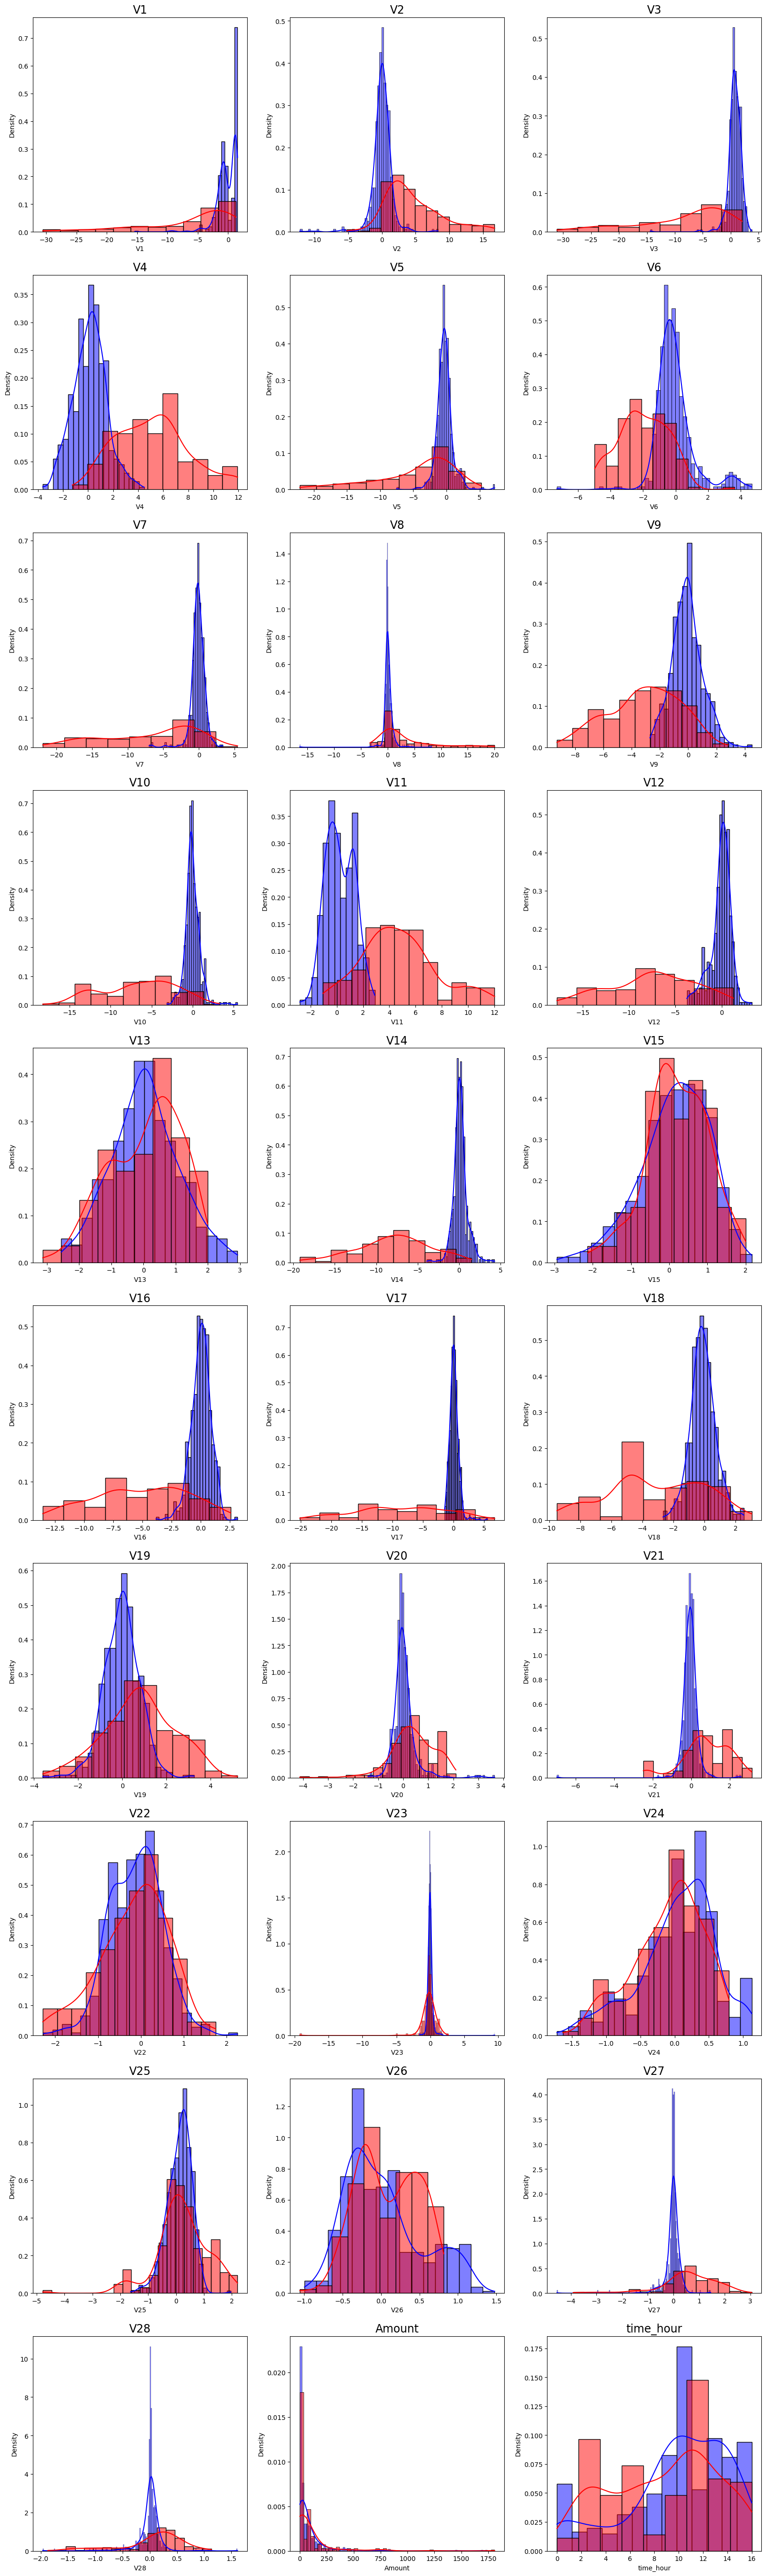

In [50]:
normal_entries = new_dataset.Class==0
fraud_entries = new_dataset.Class==1

plt.figure(figsize=(20,70))
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.histplot(x[col][normal_entries], color='blue', kde = True, stat = 'density')
    sns.histplot(x[col][fraud_entries], color='red', kde = True, stat = 'density')
    plt.title(col, fontsize=17)
plt.show()

In [51]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
pred_test = model.predict(x_test)

/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Model evaluation

In [52]:
# creating confusion matrix
from sklearn.metrics import confusion_matrix
def Plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test,pred_test)
    plt.clf()
    plt.show()


In [53]:
# accuracy on training data
acc_score= round(accuracy_score(y_pred, y_train)*100,2)

In [54]:
print('the accuracy score for training data of our model is :', acc_score)


the accuracy score for training data of our model is : 97.49


In [55]:
y_pred = model.predict(x_test)
acc_score = round(accuracy_score(y_pred, y_test)*100,2)

In [56]:
print('the accuracy score of our model is :', acc_score)

the accuracy score of our model is : 94.8


In [57]:
from sklearn import metrics

In [58]:
score = round(model.score(x_test, y_test)*100,2)
print('score of our model is :', score)

score of our model is : 94.8


In [59]:
class_report = classification_report(y_pred, y_test)
print('classification report of our model: ', class_report)

classification report of our model:                precision    recall  f1-score   support

         0.0       0.98      0.95      0.96       128
         1.0       0.86      0.96      0.91        45

    accuracy                           0.95       173
   macro avg       0.92      0.95      0.93       173
weighted avg       0.95      0.95      0.95       173



In [60]:
# we have achieved a model with decent accuracy score

# Thank You